# Step 1: Extract Text from a PDF Resume

In [1]:
pip install pymupdf

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import fitz  # PyMuPDF

def extract_text_from_pdf(file_path):
    doc = fitz.open(file_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

# Test it with a sample resume
pdf_path = "database_0.pdf"  # Change this to your PDF path
resume_text = extract_text_from_pdf(pdf_path)
print(resume_text[:1000])  # Print the first 1000 characters to check if it's working


Work Experience
Sr. Database Architect
Cognizant Technology Solutions - Pune, Maharashtra
May 2008 to Present
Role:
• Ensuring the successful delivery of big data solutions and defining solution architecture, data strategy,
principles, vision, and standards; providing advisory services around the data frameworks, governance,
and quality
• Analyzing & reviewing business, functional and high-level technical requirements; designing detailed
technical components for complex applications utilizing high-level architecture, design patterns and
reusable code
• Simulating, designing, developing & deploying computationally complex and practical data; building
and delivering comprehensive data strategy roadmaps; ensuring final deliverables are of the highest
quality
• Supporting the development, sharing, and enhancement of dashboard and reporting solutions
• Identifying ways to integrate data from the client's multiple source systems to provide consolidated
KPI reports to client
• Performing anal

# Step 2: Analyze Resume Based on Competencies

In [3]:
competency_entities = {
    "Leading and Deciding": ["deciding", "initiating actions", "supervising"],
    "Supporting": ["work with people", "persuading", "influencing"],
    "Cooperation": ["applying expertise", "analysing"],
    "Creating": ["creative", "innovative"],
    "Conceptualizing": ["learning", "researching"],
    "Organizing and Executing": ["planning", "organizing"],
    "Adapting": ["adapting to change"],
    "Coping": ["entrepreneurial thinking", "commercial thinking"],
    "Displaying and Demonstrating Job-related Skills": ["technical skills", "soft skills", "applying expertise"],
    "Mastering and Displaying Language-specific Skills": ["soft skills", "adapting to change"],
    "Demonstrating Inter/Multi/Transdisciplinary Skills": ["technical skills", "adapting to change"],
}

In [4]:
import re
from collections import defaultdict

def analyze_resume(text):
    text = text.lower()  # Convert text to lowercase for easier matching

    competency_scores = defaultdict(float)

    for competency, keywords in competency_entities.items():
        # Count occurrences of each keyword using regex
        matches = sum(len(re.findall(rf"\b{re.escape(keyword)}\b", text)) for keyword in keywords)
        competency_scores[competency] = matches

    # Normalize Scores (0 to 1 based on max value)
    max_score = max(competency_scores.values()) if competency_scores else 1

    if max_score > 0:
        for competency in competency_scores:
            competency_scores[competency] /= max_score

    return dict(competency_scores)

# Testing it with resume text from Step 1
competency_results = analyze_resume(resume_text)

# Display the results
import pprint
pprint.pprint(competency_results)


{'Adapting': 0,
 'Conceptualizing': 0,
 'Cooperation': 0,
 'Coping': 0,
 'Creating': 0,
 'Demonstrating Inter/Multi/Transdisciplinary Skills': 0,
 'Displaying and Demonstrating Job-related Skills': 0,
 'Leading and Deciding': 0,
 'Mastering and Displaying Language-specific Skills': 0,
 'Organizing and Executing': 0,
 'Supporting': 0}


# Step 3: Visualize Competency Scores as a Pie Chart

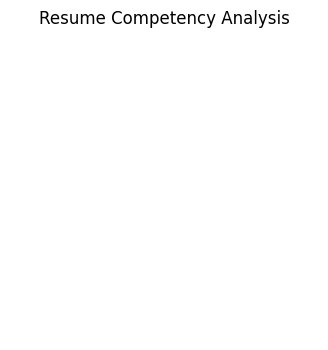

In [5]:
import matplotlib.pyplot as plt

def plot_pie_chart(competency_scores):
    # Filter out competencies with zero scores
    filtered_scores = {k: v for k, v in competency_scores.items() if v > 0}
    labels = list(filtered_scores.keys())
    sizes = list(filtered_scores.values())

    # Plotting the Pie Chart
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Resume Competency Analysis")
    plt.show()

# Call this function with the output from Step 2
plot_pie_chart(competency_results)


# Step 4: Resume Q&A Using LLaMA 2

In [16]:
pip install gpt4all

   ---------------------------------------- 0.0/119.6 MB ? eta -:--:--
    --------------------------------------- 2.9/119.6 MB 15.7 MB/s eta 0:00:08
   -- ------------------------------------- 8.4/119.6 MB 21.1 MB/s eta 0:00:06
   ---- ----------------------------------- 14.4/119.6 MB 23.9 MB/s eta 0:00:05
   ------ --------------------------------- 18.4/119.6 MB 22.7 MB/s eta 0:00:05
   ------- -------------------------------- 23.3/119.6 MB 22.8 MB/s eta 0:00:05
   -------- ------------------------------- 26.0/119.6 MB 21.1 MB/s eta 0:00:05
   --------- ------------------------------ 28.6/119.6 MB 20.0 MB/s eta 0:00:05
   ---------- ----------------------------- 32.0/119.6 MB 19.4 MB/s eta 0:00:05
   ----------- ---------------------------- 34.9/119.6 MB 18.7 MB/s eta 0:00:05
   ------------ --------------------------- 37.7/119.6 MB 18.2 MB/s eta 0:00:05
   ------------- -------------------------- 40.6/119.6 MB 17.8 MB/s eta 0:00:05
   -------------- ------------------------- 43.5/11

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [17]:
from gpt4all import GPT4All

model = GPT4All("mistral-7b-instruct-v0.1.Q4_0.gguf")  # Auto-downloads the model

Downloading: 100%|██████████| 4.11G/4.11G [11:54<00:00, 5.75MiB/s] 
Verifying: 100%|██████████| 4.11G/4.11G [00:07<00:00, 559MiB/s]


In [21]:
def ask_cv_question(resume_text, competency_scores, question):
    # Convert competency scores into a readable string
    competency_summary = "\n".join([f"{k}: {v:.2f}" for k, v in competency_scores.items()])

    # Craft the prompt with both resume content and competency analysis
    prompt = f"""
    You are a resume evaluation assistant. You will answer questions strictly based on the provided resume and competency analysis below.

    Resume Text:
    {resume_text}

    Competency Analysis (Normalized Scores from 0 to 1):
    {competency_summary}

    Now, answer the following question based only on the above data:
    {question}

    Answer:
    """

    # Generate response from GPT4All
    output = model.generate(prompt, max_tokens=150)
    return output

In [24]:
question = input("Enter your question about the resume: ")
answer = ask_cv_question(resume_text, competency_results, question)

print("\nGenerated Answer:\n")
print(answer)


Generated Answer:

1. Cognizant Technology Solutions - Pune, Maharashtra
2. Finch Software India - Bengaluru, Karnataka
3. Sify Technology Limited - Chennai, Tamil Nadu
